## Four Parameter logistic curve fitting 

Standard curve:

[ 0.34295116  1.21309224 63.36213513  2.98986419]
R^2: 1.00


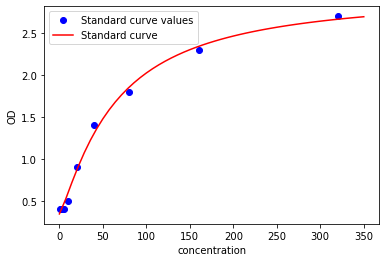

In [74]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def four_parameter_logistic(x, a, b, c, d):
      #return d / (1 + (x/c)**b)**(1/a)
      return d + (a-d)/(1+(x/c)**b)  

def fit_four_parameter_logistic(x_data, y_data):
  global a, b, c, d
  params, params_covariance = curve_fit(four_parameter_logistic, x_data, y_data, p0=[1, 1, 1, 1], maxfev=10000)
  a, b, c, d = params
  return params

x_data = np.array([0.625, 1.25, 2.5, 5, 10, 20, 40, 80, 160, 320])
y_data = np.array([0.4, 0.4, 0.4, 0.4, 0.5, 0.9, 1.4, 1.8, 2.3, 2.7])

params = fit_four_parameter_logistic(x_data, y_data)
print(params)

import matplotlib.pyplot as plt

# Generate synthetic x data in the range [0, 350]
x_data_fit = np.linspace(0, 350, 50)

# Use the optimized parameters to generate synthetic y data
y_data_fit = four_parameter_logistic(x_data_fit, *params)

# Calculate R^2
r2 = r2_score(y_data, four_parameter_logistic(x_data, *params))
print(f"R^2: {r2:.2f}")

# Plot the standard curve
plt.plot(x_data, y_data, 'bo', label='Standard curve values')
plt.plot(x_data_fit, y_data_fit, 'r', label='Standard curve')
plt.legend()
# Label the axes
plt.xlabel("concentration")
plt.ylabel("OD")
plt.show()



In [73]:
def get_x_from_y(y):
    return c * (((a - d)/(y-d))-1)**(1/b)

y_value = 1.5
x_value = get_x_from_y(y_value)
print(f"For y = {y_value}, x = {x_value:.2f}")

For y = 1.5, x = 48.72
